### Part 0, data generation function
We would like to first import some necessary Libraries for this task and then write down the data generation function as follow. 

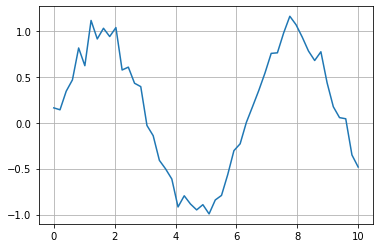

In [28]:
import matplotlib.pyplot as plt                    # Matplotlib is a comprehensive library for creating visualizations in Python
import numpy as np                                 # NumPy is the fundamental package for scientific computing in Python.
from sklearn.linear_model import LinearRegression  # The sklearn.linear_model module implements a variety of linear models.
%matplotlib inline       

# Given data
def ftrue(x):
    return np.sin(x)
def generatedata(ndata,seed):
    rng = np.random.RandomState(seed)
    Xtrain = np.linspace(0,10,ndata)
    Ytrain = np.sin(Xtrain) + 0.1 * rng.randn(ndata)
    return Xtrain,Ytrain
Xtrain,Ytrain = generatedata(50,seed=1)
plt.plot(Xtrain,Ytrain)
plt.grid()

### Part 1: Training and Validation , please finish this section
We would like to create the polynomial design matrix up to order 3.
Hint: You can use `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


For this section, we would like to fit a linear regression model to the generated data with polynomial with the order $p$ from $1$ to $20$. We need to first to generate a set of testing data set to evaluate the algorithm, as in xval, yval. We would like to use the residual sum of square error to evaluate the performance of the algorithm



Text(0.5, 1.0, 'Training data')

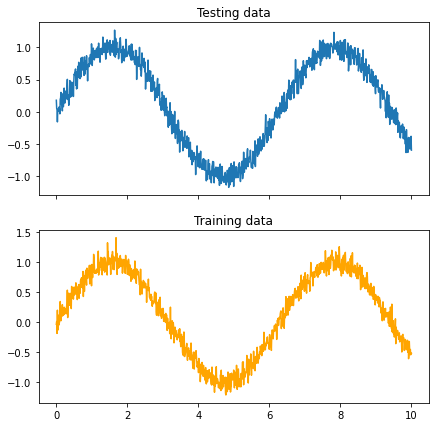

In [29]:
ntest = 1000
xval,yval = generatedata(ntest,seed=2)
xtest,ytest = generatedata(ntest,seed=3)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,7))
ax[0].plot(xtest,ytest)
ax[1].plot(xval,yval,color='orange')
ax[0].set_title('Testing data')
ax[1].set_title('Training data')

PolynomialFeatures(degree=1)
1
PolynomialFeatures()
2
PolynomialFeatures(degree=3)
3
PolynomialFeatures(degree=4)
4
PolynomialFeatures(degree=5)
5
PolynomialFeatures(degree=6)
6
PolynomialFeatures(degree=7)
7
PolynomialFeatures(degree=8)
8
PolynomialFeatures(degree=9)
9
PolynomialFeatures(degree=10)
10
PolynomialFeatures(degree=11)
11
PolynomialFeatures(degree=12)
12
PolynomialFeatures(degree=13)
13
PolynomialFeatures(degree=14)
14
PolynomialFeatures(degree=15)
15
PolynomialFeatures(degree=16)
16
PolynomialFeatures(degree=17)
17
PolynomialFeatures(degree=18)
18
PolynomialFeatures(degree=19)
19



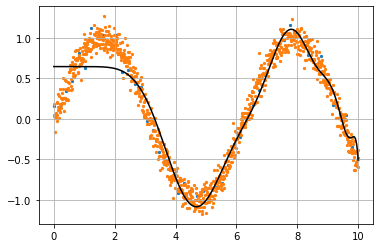

In [30]:
ntest = 1000
xval,yval = generatedata(ntest,seed=2)
from sklearn.preprocessing import PolynomialFeatures
xtest,ytest = generatedata(ntest,seed=3)
from sklearn.metrics import mean_squared_error 
SSE = np.zeros((20))
# We can define the 0 order polynomial as the mean prediction
SSE[0] = np.sum((ytest-np.mean(Ytrain))**2)

Xtrain = Xtrain[:,np.newaxis] # For reshaping of the array
xval = xval[:, np.newaxis]    # For reshaping of the array
for p in range(1,20):
    # ----------------------------------
    polyfeat = PolynomialFeatures(p)
    print(polyfeat)
    X_train1 = polyfeat.fit_transform(Xtrain)
    x_val = polyfeat.transform(xval)
    model = LinearRegression()               # Applying the linear regression to polynomial features
    model.fit(X_train1, Ytrain)
    y_pred = model.predict(x_val)            # Predicting y using test values of x
    SSE[p] = mean_squared_error(yval,y_pred) # calculate the root mean square error using predicted y value and test x value
    print(p)
    # --------------------------------------
plt.scatter(Xtrain, Ytrain, s=5)
plt.scatter(xtest, ytest, s=5)
plt.plot(xtest, y_pred, 'black')
plt.grid()
print()

In [31]:
pmin = np.argmin(SSE)
print("The order of the polynomial is",pmin)

The order of the polynomial is 8


Text(0, 0.5, 'Log(SSE)')

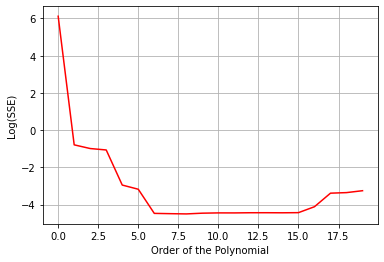

In [32]:
plt.plot(np.log(SSE),color='red')     # Plotting the SSE by applying the log function
plt.grid()                            # Grid setting on
plt.xlabel('Order of the Polynomial') # setting label to the x-axis
plt.ylabel('Log(SSE)')                # Setting label to the y-axis 

In [33]:
SSE

array([4.54106527e+02, 4.53351018e-01, 3.71820124e-01, 3.44245576e-01,
       5.22545699e-02, 4.17471810e-02, 1.14071951e-02, 1.12328200e-02,
       1.10851129e-02, 1.15328203e-02, 1.17100178e-02, 1.16992127e-02,
       1.18091953e-02, 1.18218663e-02, 1.17761796e-02, 1.18649179e-02,
       1.63175852e-02, 3.37913240e-02, 3.48283112e-02, 3.85774614e-02])

### Observations : 
Observing the output, we can see that 8th order seems favorable by minimizing the validation accuracy, but choosing 6 also make senses since the SSE is 1.14071951e-02, which is close to 8th order 1.10851129e-02. 

We would prefer to use the 8th order polynomial because this observation from the plot shows that it gives lowest error. 

### Part 2: Visualization of your final model
Please plot the final model that you would like to use for this problem.

In [34]:
# Put your code here ----------------
ntest = 100
x_test, y_test = generatedata(ntest,seed=3)
x_test = x_test[:, np.newaxis]
x_test.shape, y_test.shape
#-----------------------------------

((100, 1), (100,))

Text(0.5, 1.0, 'The MSE will be 0.01232 with order 8')

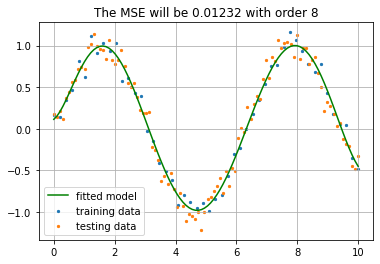

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

pmin = 8
# Use polynomial features
polyfeat1 = PolynomialFeatures(pmin)       # Applying the polynomial features to pmin   
X_train2 = polyfeat1.fit_transform(Xtrain) # This method performs fit and transform on the input data at a single time and converts the data points
x_test_ = polyfeat1.transform(x_test)      # Returns a self-produced dataframe with transformed values after applying the function specified in its parameter
model = LinearRegression()                 # Apply LR to polynomial features
model.fit(X_train2, Ytrain)                # fit the data to the model
y_pred = model.predict(x_test_)            # Get predicted y value using test x value

plt.scatter(Xtrain, Ytrain, s=5)
plt.scatter(x_test, y_test, s=5)
plt.grid()
plt.plot(x_test, y_pred, 'green')
plt.legend(['fitted model', 'training data', 'testing data'])
plt.title('The MSE will be {:.5f} with order {}'.format(mean_squared_error(y_test,y_pred),pmin))

### Part 3: Ridge Polynomial Regression Using 10th order polynomial
Does the model overfit if we use 10th order polynomial? How ridge regression can prevent it.
Please find the best ridge regression result and evaluate the testing accuracy

The best value of alpha will be 0.0512 Hence this will be the best tuning parameter


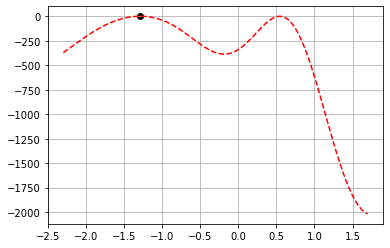

In [36]:
p = 10  # We set the order of the polynomial as 10
ntest = 100
poly = PolynomialFeatures(p)
xtest,ytest = generatedata(ntest,seed=3)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

x_train,y_train = generatedata(50,seed=1)  
X_train = x_train.reshape(-1,1)
rmse = np.zeros((20))
alphas = p**np.linspace(-2,2,100)*0.5

cross_val_results = np.zeros(len(alphas))
for a,alpha in enumerate(alphas):
    pipe = Pipeline(steps=[('polynomial transform', PolynomialFeatures(p)), ('Ridge', Ridge(alpha = alpha))])
    cross_val_res = cross_validate(pipe, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
    cross_val_results[a] = np.mean(cross_val_res['test_score'])

plt.plot(np.log10(alphas),cross_val_results,color='red',linestyle='dashed')
plt.grid()
a_best = np.argmax(cross_val_results)
best_alpha = round(alphas[a_best],4)
plt.scatter(np.log10(best_alpha),cross_val_results[a_best],color='black')
print('The best value of alpha will be',best_alpha,'Hence this will be the best tuning parameter')

This is the testing accuracy => 0.012665629158978857


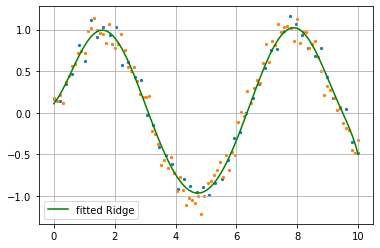

In [37]:
pipe = Pipeline(steps=[('polynomial transform', PolynomialFeatures(p)), ('Ridge', Ridge(alpha = best_alpha))])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(x_test.reshape(-1,1))
mean_squared_error(y_pred,y_test)
print('This is the testing accuracy =>',mean_squared_error(y_pred,y_test))
plt.scatter(x_train, y_train, s=5)
plt.scatter(x_test, y_test, s=5)
plt.plot(x_test, y_pred, 'green')
plt.legend(['fitted Ridge'])
plt.grid()

We can observe that the model does overfit if we use 10th polynomial.  Ridge regression prevent it by adding regularzing term(penalize parameters).

# 4.
Part 4: For this question, since we are simulating the example and we do know thetrue function. Can you use simulation to compute the bias and variance for different tuning parameter of the Ridge Polynomial Regression? If so, please use simulation to estimate the bias and variance for Ridge Polynomial Regression for a certain range and comment on the result.

In [38]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# To evaluate the bias and variance
n_sims = 100   # Conduct 100 simulation runs
n_models = 20  # 20 models to be compared with each other
p=10

x0 = np.array([5])                        # Arbitrarily choose x0=5
predictions = np.zeros((n_sims,n_models)) # initial array to store predicted value
y_true = ftrue(x_test)
n_sims = 500

alphas = p**np.linspace(-2,5,20)*0.5
bias = np.zeros(len(alphas))
variance = np.zeros(len(alphas))

for i,alpha in enumerate(alphas):
    pipe = Pipeline(steps=[('polynomial transform', PolynomialFeatures(p)), ('Ridge', Ridge(alpha = alpha))])
    y_pred_all = np.zeros((y_pred.shape[0],n_sims))
    for j in range(n_sims):
        Xtrain,Ytrain = generatedata(50,seed=j)
        Xtrain=Xtrain.reshape(-1,1)
        pipe.fit(Xtrain,Ytrain)
        y_pred_all[:,j] = pipe.predict(x_test)
    bias[i] = np.sum((np.mean(y_pred_all,1) - y_true[:,0])**2)
    variance[i] = np.sum(np.std(y_pred_all,1)**2)

Text(0.5, 1.0, 'Bias')

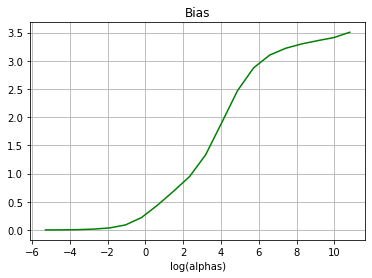

In [39]:
plt.plot(np.log(alphas),bias,'g-')
plt.xlabel('log(alphas)')
plt.grid()
plt.title('Bias')

Text(0.5, 1.0, 'Variance')

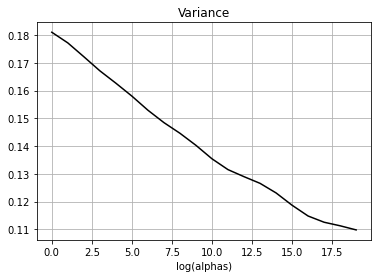

In [40]:
plt.plot(variance,'k-')
plt.xlabel('log(alphas)')
plt.grid()
plt.title('Variance')